# CIFAR-10 Image Classification with CNN (Optimized for Faster Training)
This notebook builds and trains a Convolutional Neural Network on the CIFAR-10 dataset using TensorFlow and Keras. We use data augmentation and early stopping for better generalization and also subsample the training dataset for faster execution.

## 1. Import Required Libraries

In [3]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 2. Load and Preprocess the CIFAR-10 Dataset

In [4]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


## 3. Define Class Labels

In [5]:

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


## 4. Build a Deep CNN Model

In [6]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Compile the Model

In [7]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 6. Split and Subsample the Training Data

In [8]:

# Split training into train and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Subsample 60% of the training data
sample_size = int(0.6 * len(x_train_new))
x_sample = x_train_new[:sample_size]
y_sample = y_train_new[:sample_size]


## 7. Set Up Data Augmentation and Early Stopping

In [9]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_sample)

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


## 8. Train the Model (10–20 Epochs for Speed)

In [10]:

history = model.fit(
    datagen.flow(x_sample, y_sample, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=20,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 - 31s - 82ms/step - accuracy: 0.3563 - loss: 1.8950 - val_accuracy: 0.2488 - val_loss: 2.5043
Epoch 2/20
375/375 - 31s - 82ms/step - accuracy: 0.4882 - loss: 1.4291 - val_accuracy: 0.4886 - val_loss: 1.5498
Epoch 3/20
375/375 - 14s - 38ms/step - accuracy: 0.5533 - loss: 1.2546 - val_accuracy: 0.4506 - val_loss: 2.0588
Epoch 4/20
375/375 - 20s - 54ms/step - accuracy: 0.5960 - loss: 1.1389 - val_accuracy: 0.6194 - val_loss: 1.0891
Epoch 5/20
375/375 - 14s - 37ms/step - accuracy: 0.6295 - loss: 1.0486 - val_accuracy: 0.6382 - val_loss: 1.0759
Epoch 6/20
375/375 - 14s - 38ms/step - accuracy: 0.6523 - loss: 0.9851 - val_accuracy: 0.6625 - val_loss: 0.9984
Epoch 7/20
375/375 - 14s - 38ms/step - accuracy: 0.6743 - loss: 0.9360 - val_accuracy: 0.6989 - val_loss: 0.8582
Epoch 8/20
375/375 - 14s - 37ms/step - accuracy: 0.6902 - loss: 0.8940 - val_accuracy: 0.7137 - val_loss: 0.8124
Epoch 9/20
375/375 - 21s - 56ms/step - accuracy: 0.7044 - loss: 0.8549 - val_accuracy: 0.7242 - val_loss: 0

## 9. Evaluate the Model

In [11]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 1s - 3ms/step - accuracy: 0.7899 - loss: 0.6387
Test accuracy: 0.789900004863739


## 10. Classification Report and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.86      0.74      0.80      1000
  automobile       0.90      0.94      0.92      1000
        bird       0.76      0.69      0.72      1000
         cat       0.78      0.48      0.60      1000
        deer       0.75      0.79      0.77      1000
         dog       0.78      0.64      0.70      1000
        frog       0.62      0.95      0.75      1000
       horse       0.81      0.87      0.84      1000
        ship       0.89      0.89      0.89      1000
       truck       0.83      0.91      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



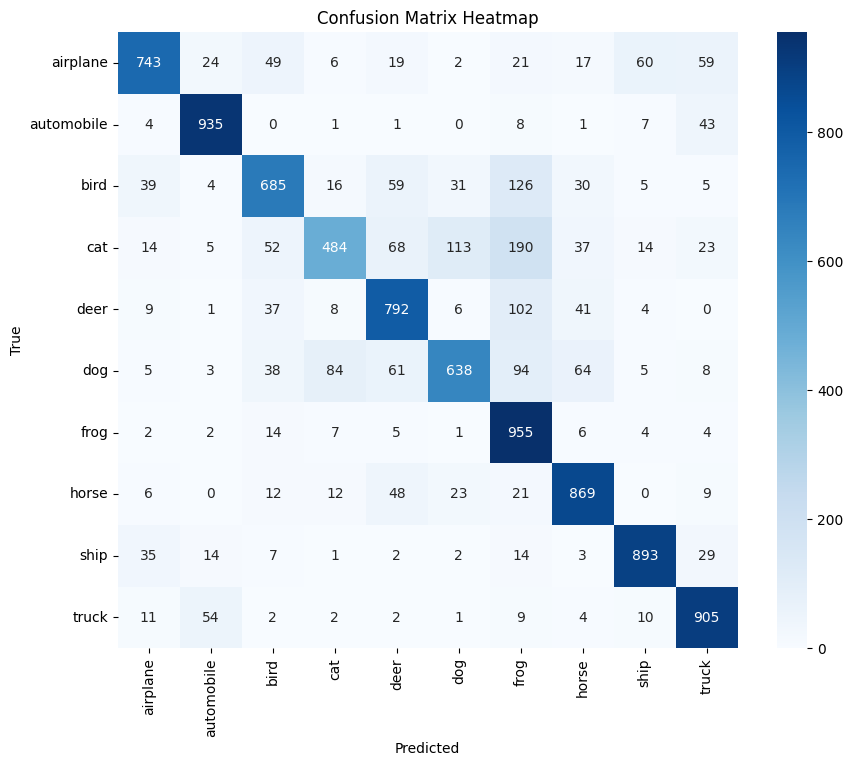

In [12]:

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


## 11. Accuracy and Loss Plots

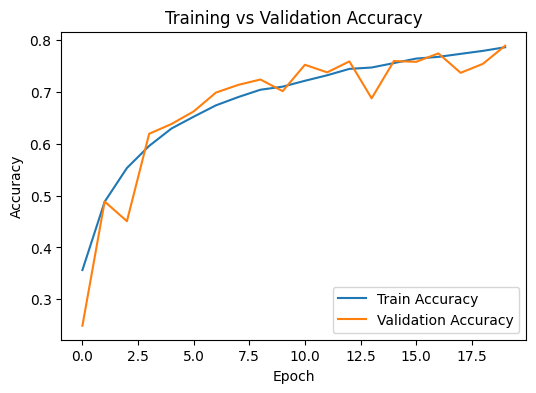

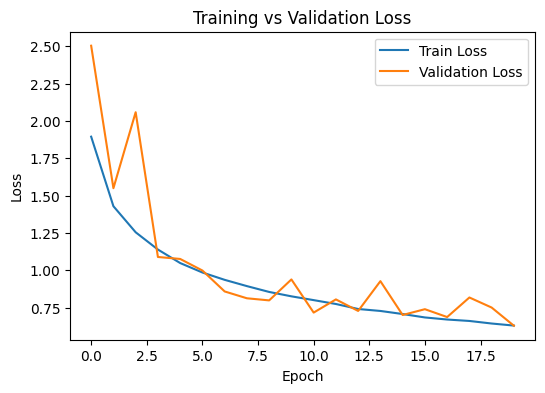

In [13]:

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


## 12. Sample Predictions

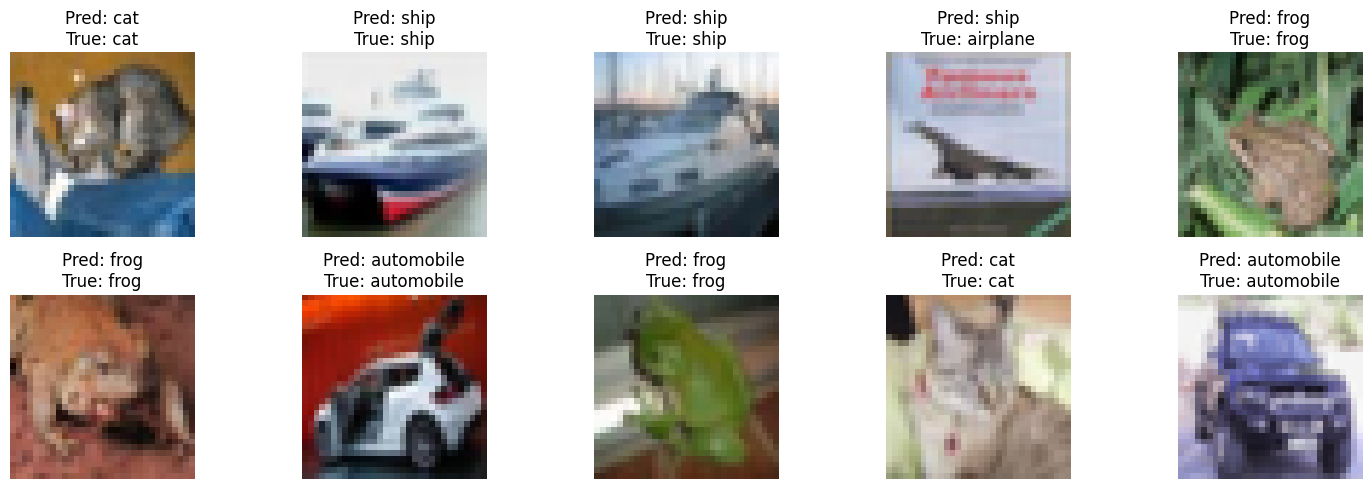

In [14]:

def show_sample_predictions(x_data, y_true, y_pred, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(x_data[i])
        plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_true[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_predictions(x_test, y_test, y_pred, class_names)


## 13. Show Misclassified Images

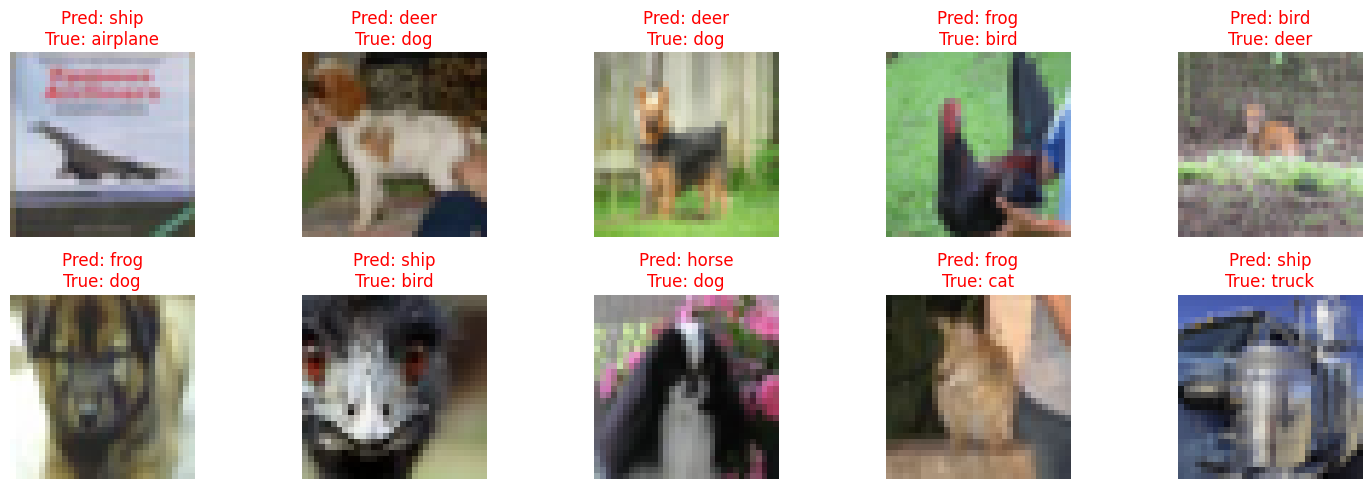

In [15]:

def show_misclassified_images(x_data, y_true, y_pred, class_names, num_images=10):
    misclassified_indices = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(misclassified_indices[:num_images]):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(x_data[idx])
        plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_misclassified_images(x_test, y_test, y_pred, class_names)


## 14. Predict a Specific Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


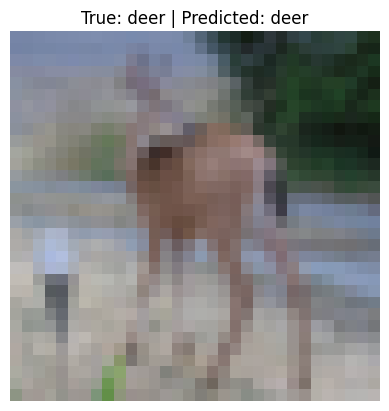

In [16]:

index = 100
img = x_test[index]
true_label = y_test[index]

img_input = np.expand_dims(img, axis=0)
pred_probs = model.predict(img_input)
predicted_label = np.argmax(pred_probs[0])

plt.imshow(img)
plt.title(f"True: {class_names[true_label]} | Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()


In [17]:
model.save("cifar10_cnn_model.h5")


In [18]:
from google.colab import files
files.download("cifar10_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>